# Explore here

In [52]:
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
total_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [55]:
total_data[total_data.duplicated(keep=False)]


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [56]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


[Text(0, 0.5, '')]

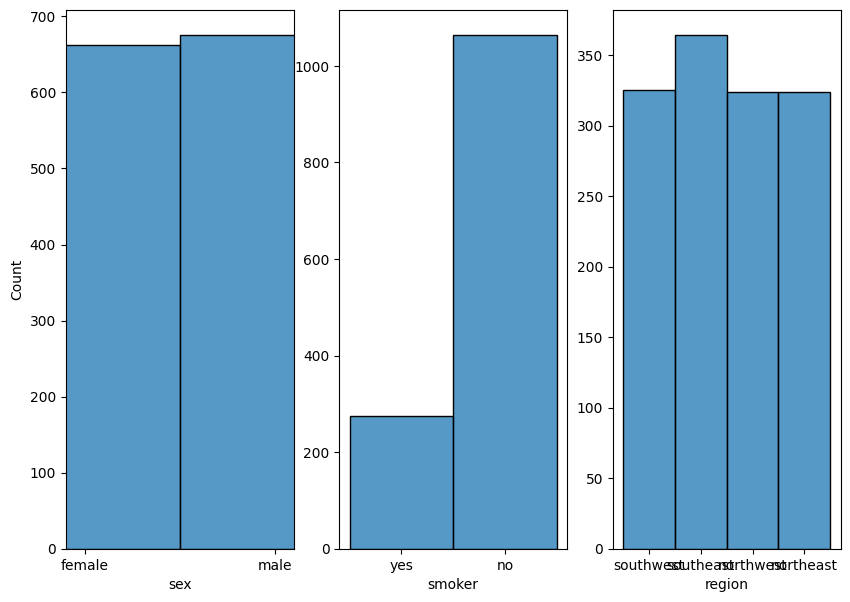

In [57]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (10, 7))

sns.histplot(ax = axis[0], data = total_data, x = "sex").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[1], data = total_data, x = "smoker").set(ylabel = None)
sns.histplot(ax = axis[2], data = total_data, x = "region").set(ylabel = None)


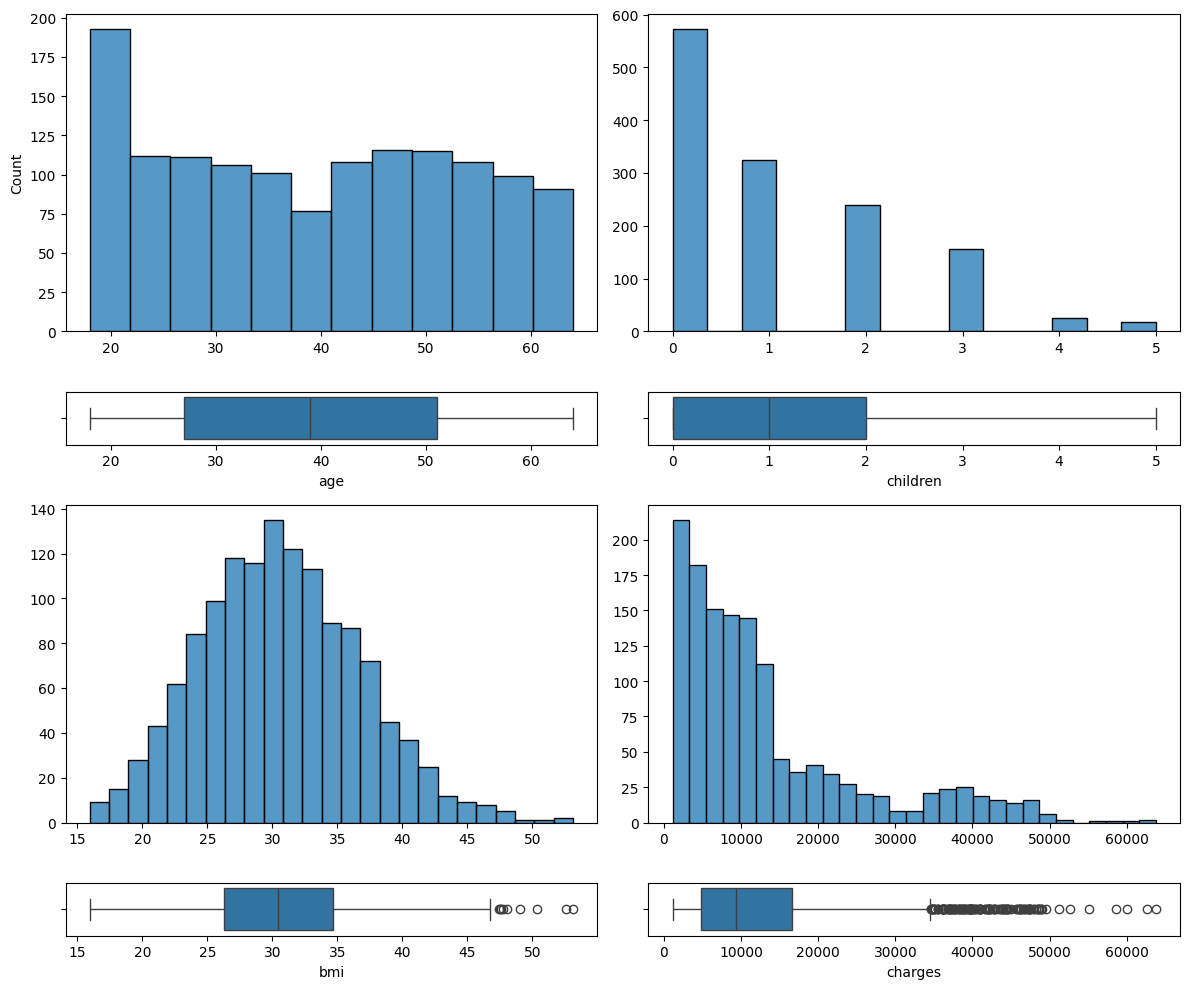

In [58]:
fig, axis = plt.subplots(4, 2, figsize = (12, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data, x = "children").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "children")

sns.histplot(ax = axis[2, 0], data = total_data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "bmi")

sns.histplot(ax = axis[2, 1], data = total_data, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "charges")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

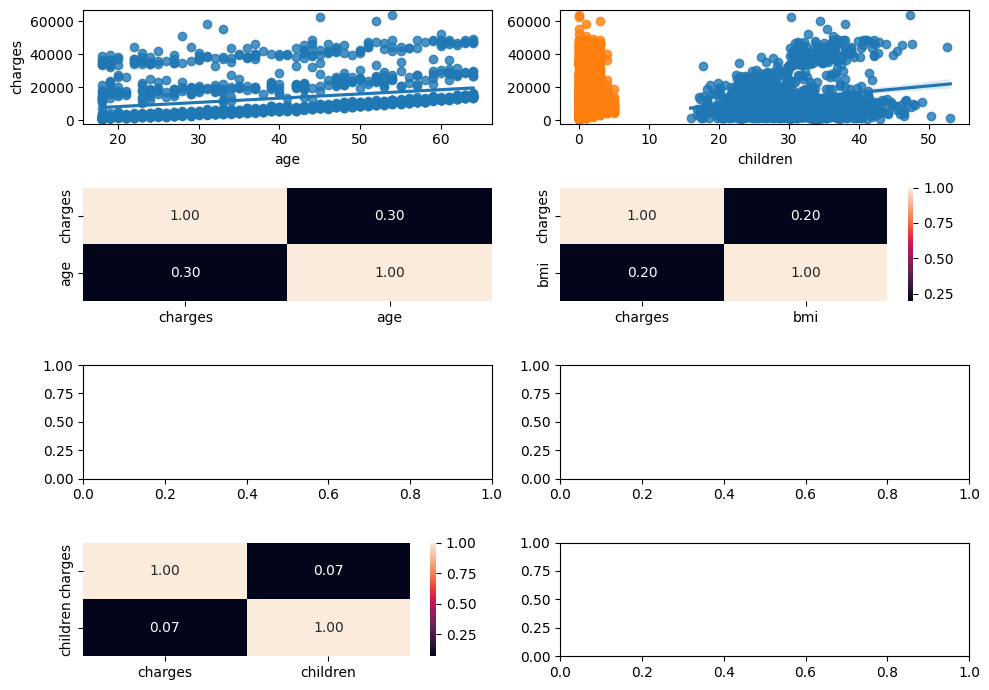

In [59]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 1], data = total_data, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

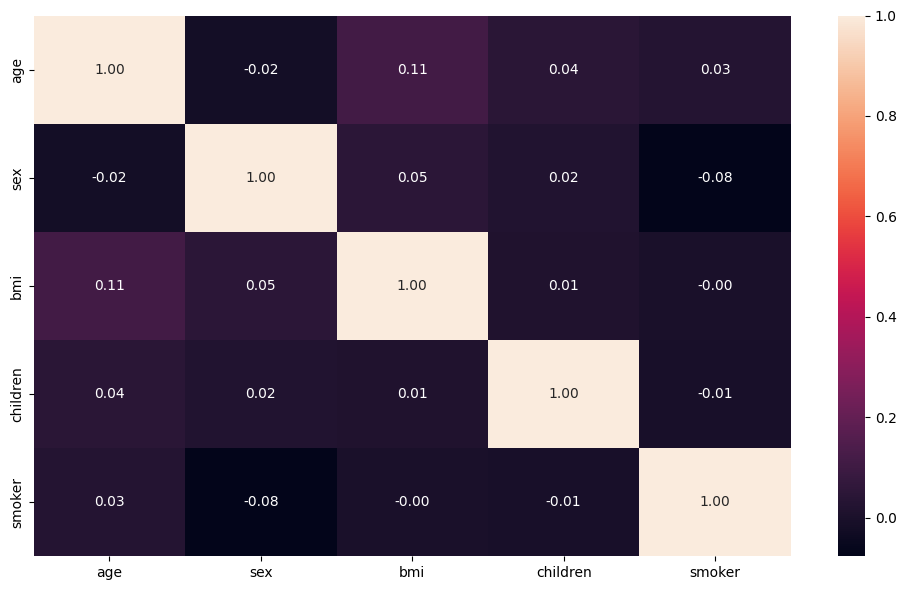

In [60]:
total_data["sex"] = pd.factorize(total_data["sex"])[0]
total_data["smoker"] = pd.factorize(total_data["smoker"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["age", "sex", "bmi", "children", "smoker"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

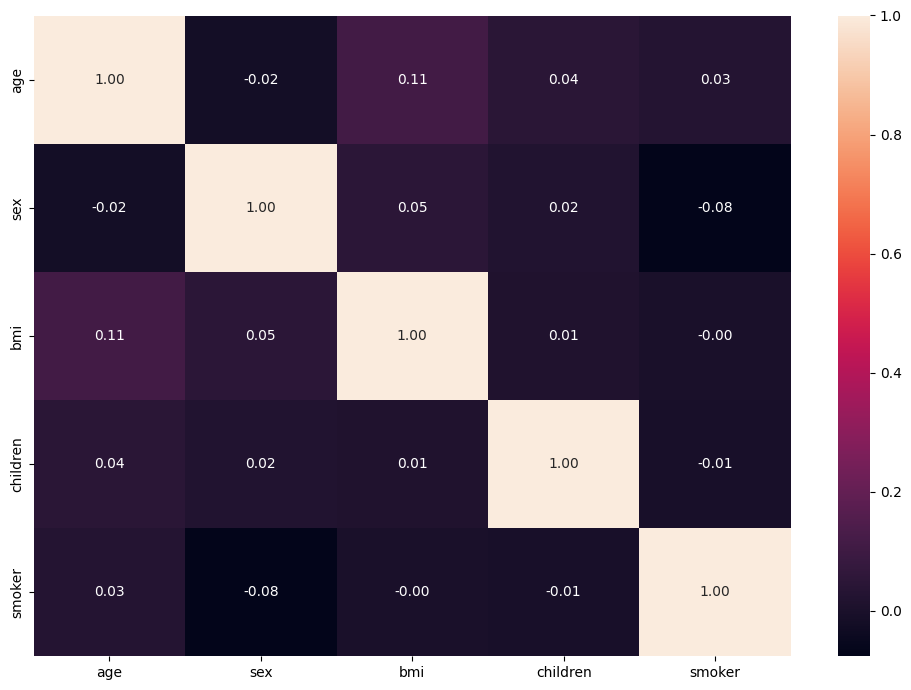

In [61]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["age", "sex", "bmi", "children", "smoker"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [62]:
total_data.describe()


,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


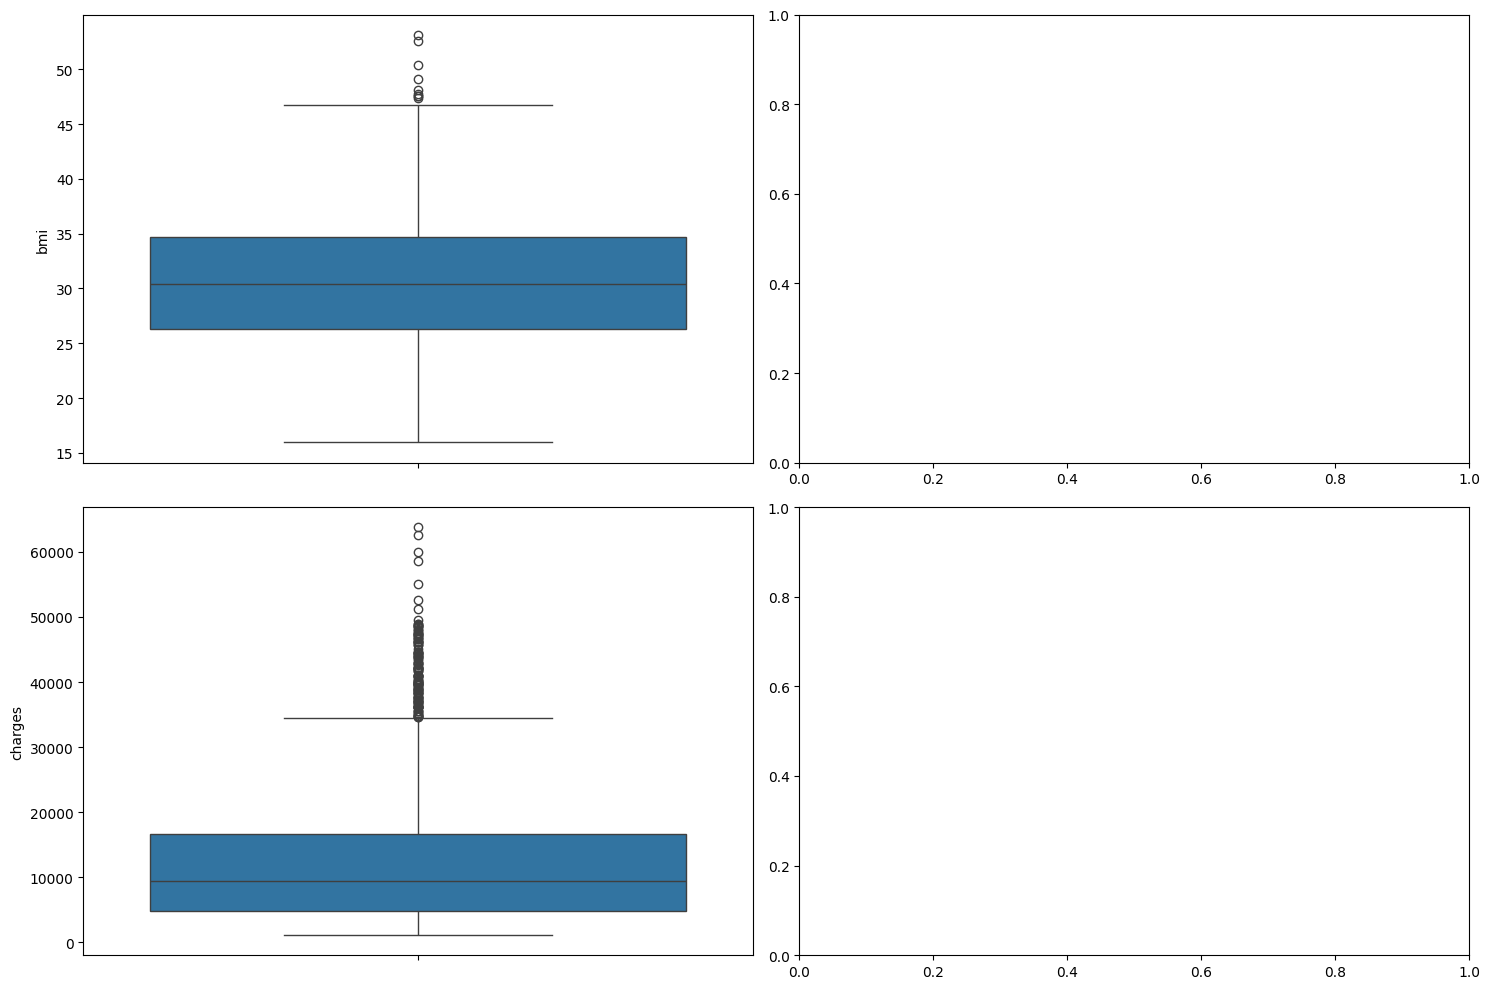

In [87]:
fig, axis = plt.subplots(2, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "bmi")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "charges")

plt.tight_layout()

plt.show()

In [88]:
total_data[total_data["charges"] > 50000]


,age,sex,bmi,children,smoker,region,charges
34,28,1,36.400,1,0,southwest,51194.55914
543,54,0,47.410,0,0,southeast,63770.42801
577,31,0,38.095,1,0,northeast,58571.07448
818,33,0,35.530,0,0,northwest,55135.40209
1145,60,1,32.800,0,0,southwest,52590.82939
1229,52,1,34.485,3,0,northwest,60021.39897
1299,45,1,30.360,0,0,southeast,62592.87309


In [89]:
total_data = total_data[total_data["charges"] <= 50000]

In [95]:
total_data = total_data.drop("region", axis=1)

In [90]:
total_data.isnull().sum().sort_values(ascending=False)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [96]:
total_data.head()


,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,0,16884.92400
1,18,1,33.770,1,1,1725.55230
2,28,1,33.000,3,1,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520


In [98]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "sex", "bmi", "children", "smoker"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("charges", axis = 1)[num_variables]
y = total_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,sex,bmi,children,smoker
848,55,1,32.775,0,1
171,49,1,30.300,0,1
946,37,1,34.200,1,0
462,62,0,38.095,2,1
210,20,1,33.000,1,1


In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,age,sex,bmi,children,smoker
848,1.118636,0.986928,0.347088,-0.896302,0.491467
171,0.690162,0.986928,-0.062292,-0.896302,0.491467
946,-0.166785,0.986928,0.582792,-0.067748,-2.034723
462,1.618522,-1.013246,1.227048,0.760806,0.491467
210,-1.380794,0.986928,0.384305,-0.067748,0.491467


In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,age,sex,bmi,children,smoker
848,0.804348,1.0,0.452381,0.0,1.0
171,0.673913,1.0,0.385795,0.0,1.0
946,0.413043,1.0,0.490718,0.2,0.0
462,0.956522,0.0,0.595507,0.4,1.0
210,0.043478,1.0,0.458434,0.2,1.0


In [105]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [106]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 11606.876054044733
Coeficientes (b): [   270.26871256   -207.72837511    294.1616388     546.63253214
 -23383.0089528 ]


In [107]:
y_pred = model.predict(X_test)
y_pred

array([ 4.93165151e+03,  1.81232941e+04,  1.01435743e+04,  7.56760408e+03,
        2.36073542e+04,  2.62992932e+04,  3.67677364e+04,  9.88445565e+02,
        1.29637142e+04,  2.82917743e+03,  2.64953015e+04,  1.07802687e+04,
        3.67797475e+03,  3.56821231e+03,  4.14334472e+03,  7.95199314e+03,
        1.00956580e+04,  9.03859123e+03,  9.88425030e+03,  2.85809292e+04,
        7.98218767e+02,  1.01641347e+04,  2.88799451e+03,  2.58308718e+04,
        8.77456784e+03,  5.53068286e+03,  7.07686226e+03,  8.66179080e+03,
        1.41032461e+04,  2.90361618e+04,  3.26452516e+04,  7.36481360e+03,
        7.22299564e+03,  1.77138568e+03,  4.31685368e+03,  6.11358461e+03,
        3.68126093e+04,  3.20470851e+04,  3.08651513e+02,  3.50926208e+04,
        1.76533707e+04, -1.54144952e+02,  9.00192274e+03,  3.31552043e+04,
        1.44365342e+04,  7.37468551e+03,  1.35839530e+04,  3.11229260e+03,
        2.55977333e+04,  7.55080692e+03,  4.39701563e+02,  1.07739256e+04,
        1.44790222e+04,  

In [111]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 38047422.658440426
Coeficiente de determinación: 0.7295848608593698


In [113]:
import numpy as np

np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(6168.259289170684)